In [ ]:
from backtester import BackTester
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
sns.set_theme()

In [ ]:
backtest = BackTester(file_name = 'combined_minute.csv',
                     start_date='2018-05-02',
                     end_date ='2022-02-18',
                     gex_bins = 16,
                     transaction_cost= 5,
                     starting_capital = 250000000,
                     leverage = 1.5)

In [ ]:
backtest.data.head()

In [ ]:
intraday_std = backtest.data.reset_index().groupby('index')['open_ask_price'].var().apply(np.log) + 5
gex = backtest.data.reset_index().groupby('index')['gex'].mean().shift(-1)/1e10

In [ ]:
plt.scatter(gex, intraday_std)
plt.xlabel('Dealer Gamma Exposure (t-1)')
plt.ylabel('SPX Intraday Vol  (t)')
plt.title('Dealer Gamma Exposure vs Intraday Change (SPX)')
#plt.vlines(-.19, 0, 7)

In [63]:
intraday_std = backtest.data.reset_index().groupby('index')['open_ask_price'].var().apply(np.log) + 5
gex = backtest.data.reset_index().groupby('index')['gex'].mean().shift(-1)/1e10

Text(0.5, 1.0, 'Dealer Gamma Exposure vs Intraday Change (SPX)')

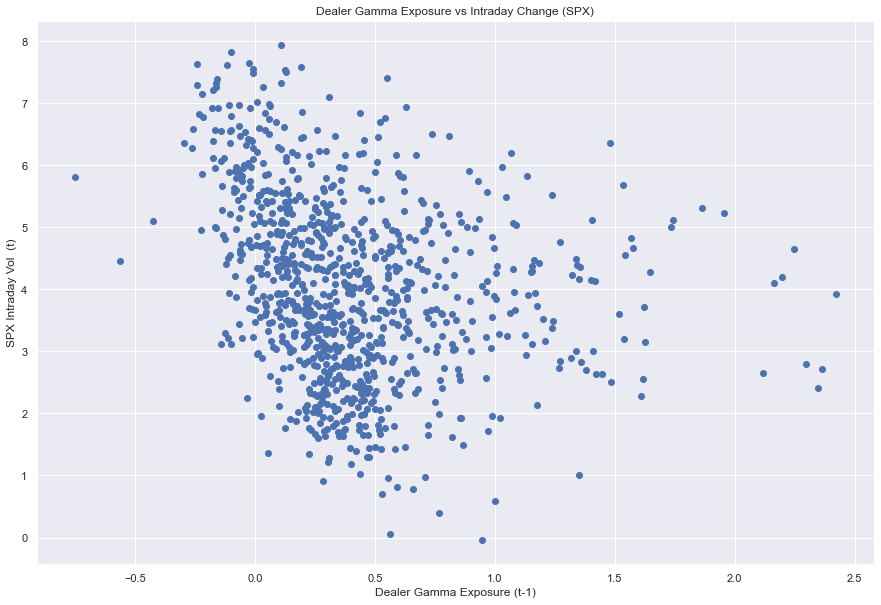

In [66]:
plt.scatter(gex, intraday_std)
plt.xlabel('Dealer Gamma Exposure (t-1)')
plt.ylabel('SPX Intraday Vol  (t)')
plt.title('Dealer Gamma Exposure vs Intraday Change (SPX)')
#plt.vlines(-.19, 0, 7)

In [15]:
backtest.benchmark_changes = backtest.data.groupby(level=0).nth(-1)[['close_ask_price']].pct_change()
rets = [backtest.evaluate_benchmark_for_day(day) for day in backtest.data.index.unique()]

backtest.evaluate_strategy(mr_sma=60,
                       mr_threshold=0.01,
                       mom_period=60)


2022-02-18 00:00:00 equity: 380035387.00084484 return: 0.0023127335948277036, total transactions: 31


In [20]:
df = pd.DataFrame(backtest.equity_curve[1:], index = backtest.data.index.unique()).rename({0:'Strategy'}, axis = 1)
df['SPY'] = backtest.equity_curve_benchmark(250000000, 1.2, rets)[1:]
df.index = pd.to_datetime(df.index)

Text(0.5, 1.0, 'Intraday Gamma Weighted Mean Reversion & Momentum Strategy vs SPY Buy and Hold')

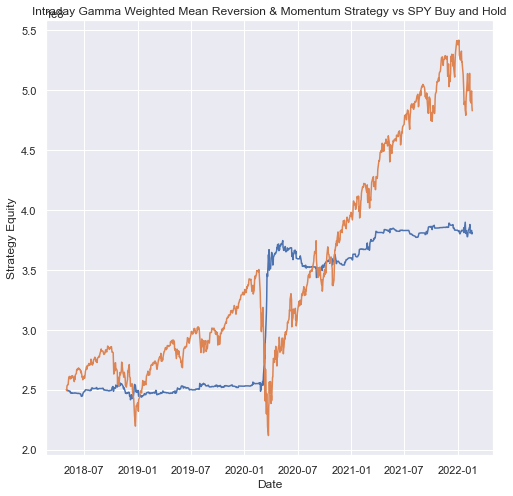

In [21]:
plt.figure(figsize = (8,8))
plt.plot(df['Strategy'])
plt.plot(df['SPY'])
plt.xlabel('Date')
plt.ylabel('Strategy Equity')
plt.title('Intraday Gamma Weighted Mean Reversion & Momentum Strategy vs SPY Buy and Hold')

Text(0.5, 1.0, 'Intraday Gamma Weighted Mean Reversion ( No Fees) & Momentum Strategy vs SPY Buy and Hold')

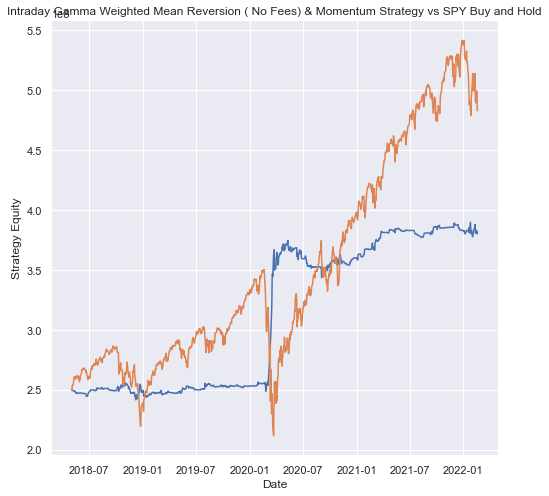

In [22]:
plt.figure(figsize = (8,8))
plt.plot(df['Strategy'])
plt.plot(df['SPY'])
plt.xlabel('Date')
plt.ylabel('Strategy Equity')
plt.title('Intraday Gamma Weighted Mean Reversion ( No Fees) & Momentum Strategy vs SPY Buy and Hold')